In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 6.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pi88kOR9KqELJFxkdFE6")
project = rf.workspace("ae-43fv6").project("body-parts-cq3al")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.55, to fix: `pip install ultralytics==8.0.196`


In [7]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Body-Parts-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [9]:
model = YOLO('yolov8n.pt')
model = YOLO('/content/runs/detect/train3/weights/best.pt')

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Body-Parts-2/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        160       1055      0.756      0.702      0.718      0.516
                  boot         35         39      0.664      0.558      0.553       0.43
                   car        142        145       0.93      0.979      0.955      0.855
                  door         50         52      0.777      0.692      0.833      0.537
          front_bumper         30         30       0.49      0.333      0.467      0.323
           front_grill         49         51      0.744      0.626      0.614      0.459
      front_windshield         54         56       0.94      0.839      0.929      0.735
              headlamp         76        117      0.755      0.786      0.812      0.591
                  hood         50         50      0.708       0.74      0.723      0.577
         license_plate        114        117      0.863      0.859      0.826      0.613
                 panel         17         18      0.871        0.5      0.573      0.391
           rear_bumpe

array([    0.42952,     0.85494,     0.53651,     0.32256,     0.45864,     0.73514,     0.59135,      0.5767,     0.61322,     0.39054,     0.38892,     0.51373,     0.42762,     0.49931,     0.49981,     0.41113])

In [11]:
# Load a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Define path to directory containing images and videos for inference
source = "path/to/dir"

# Run inference on the source
results = model(source, stream=True)  # generator of Results objects

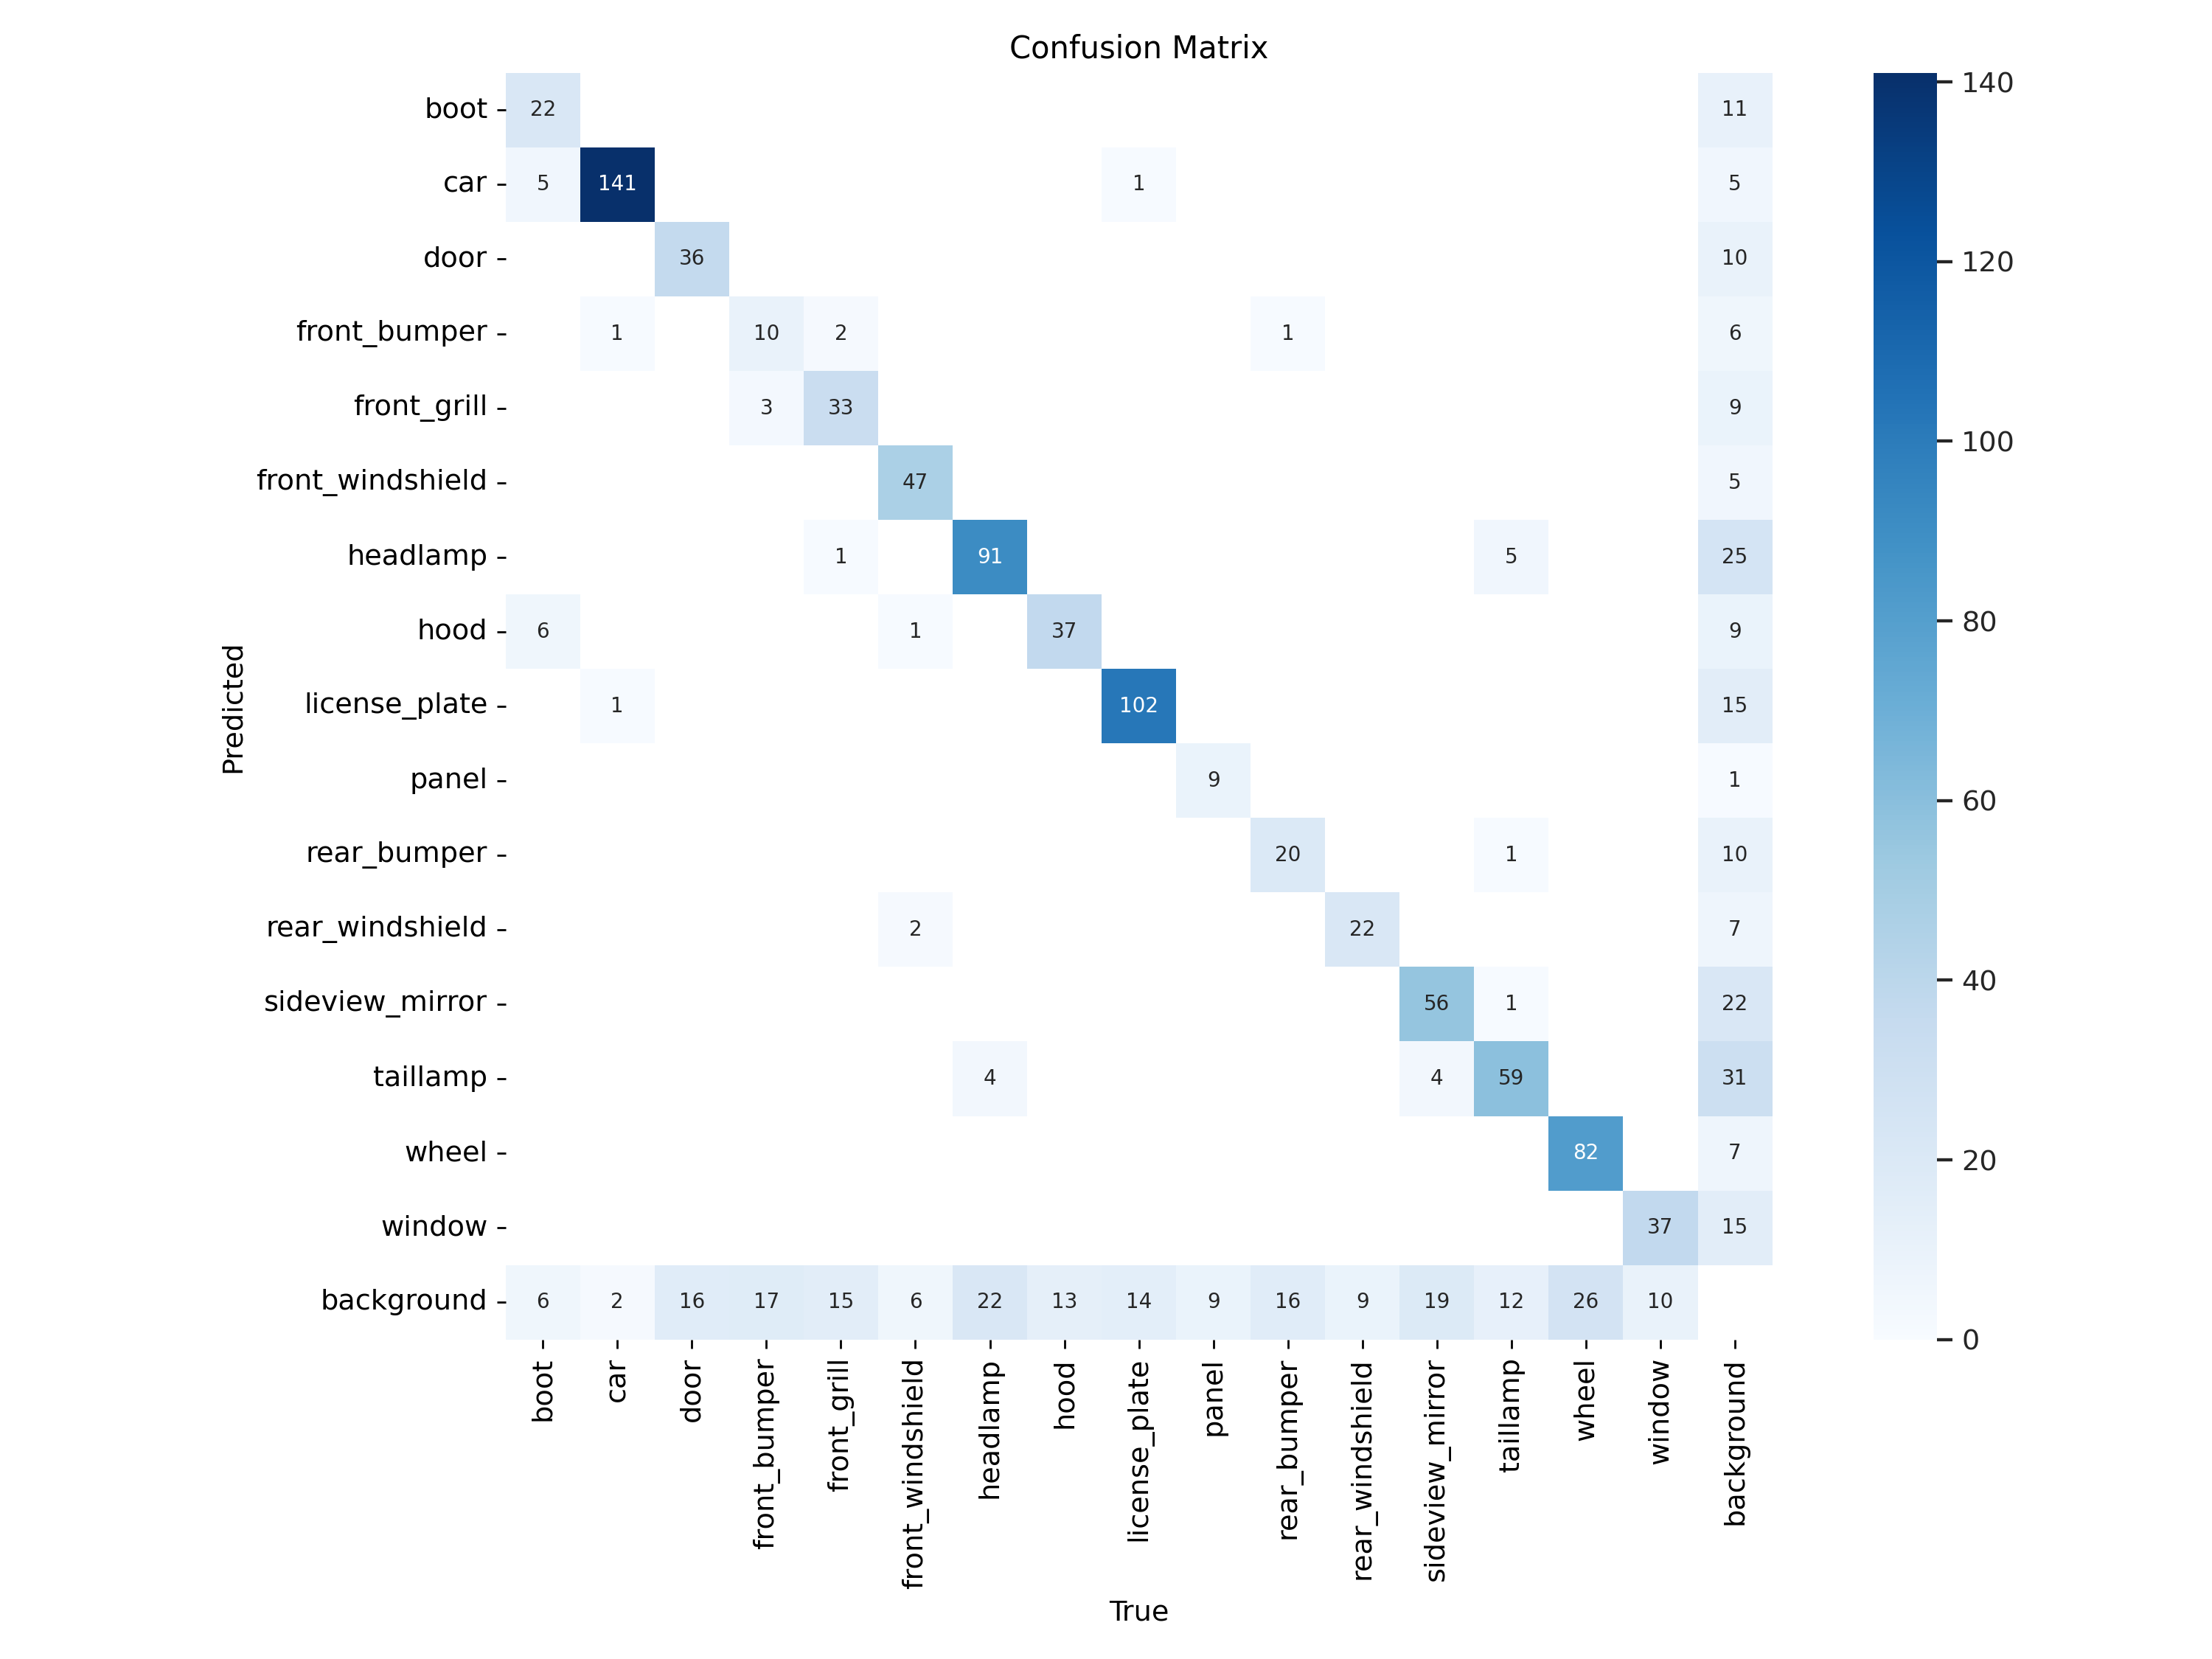

In [14]:
Image('/content/runs/detect/train3/confusion_matrix.png')

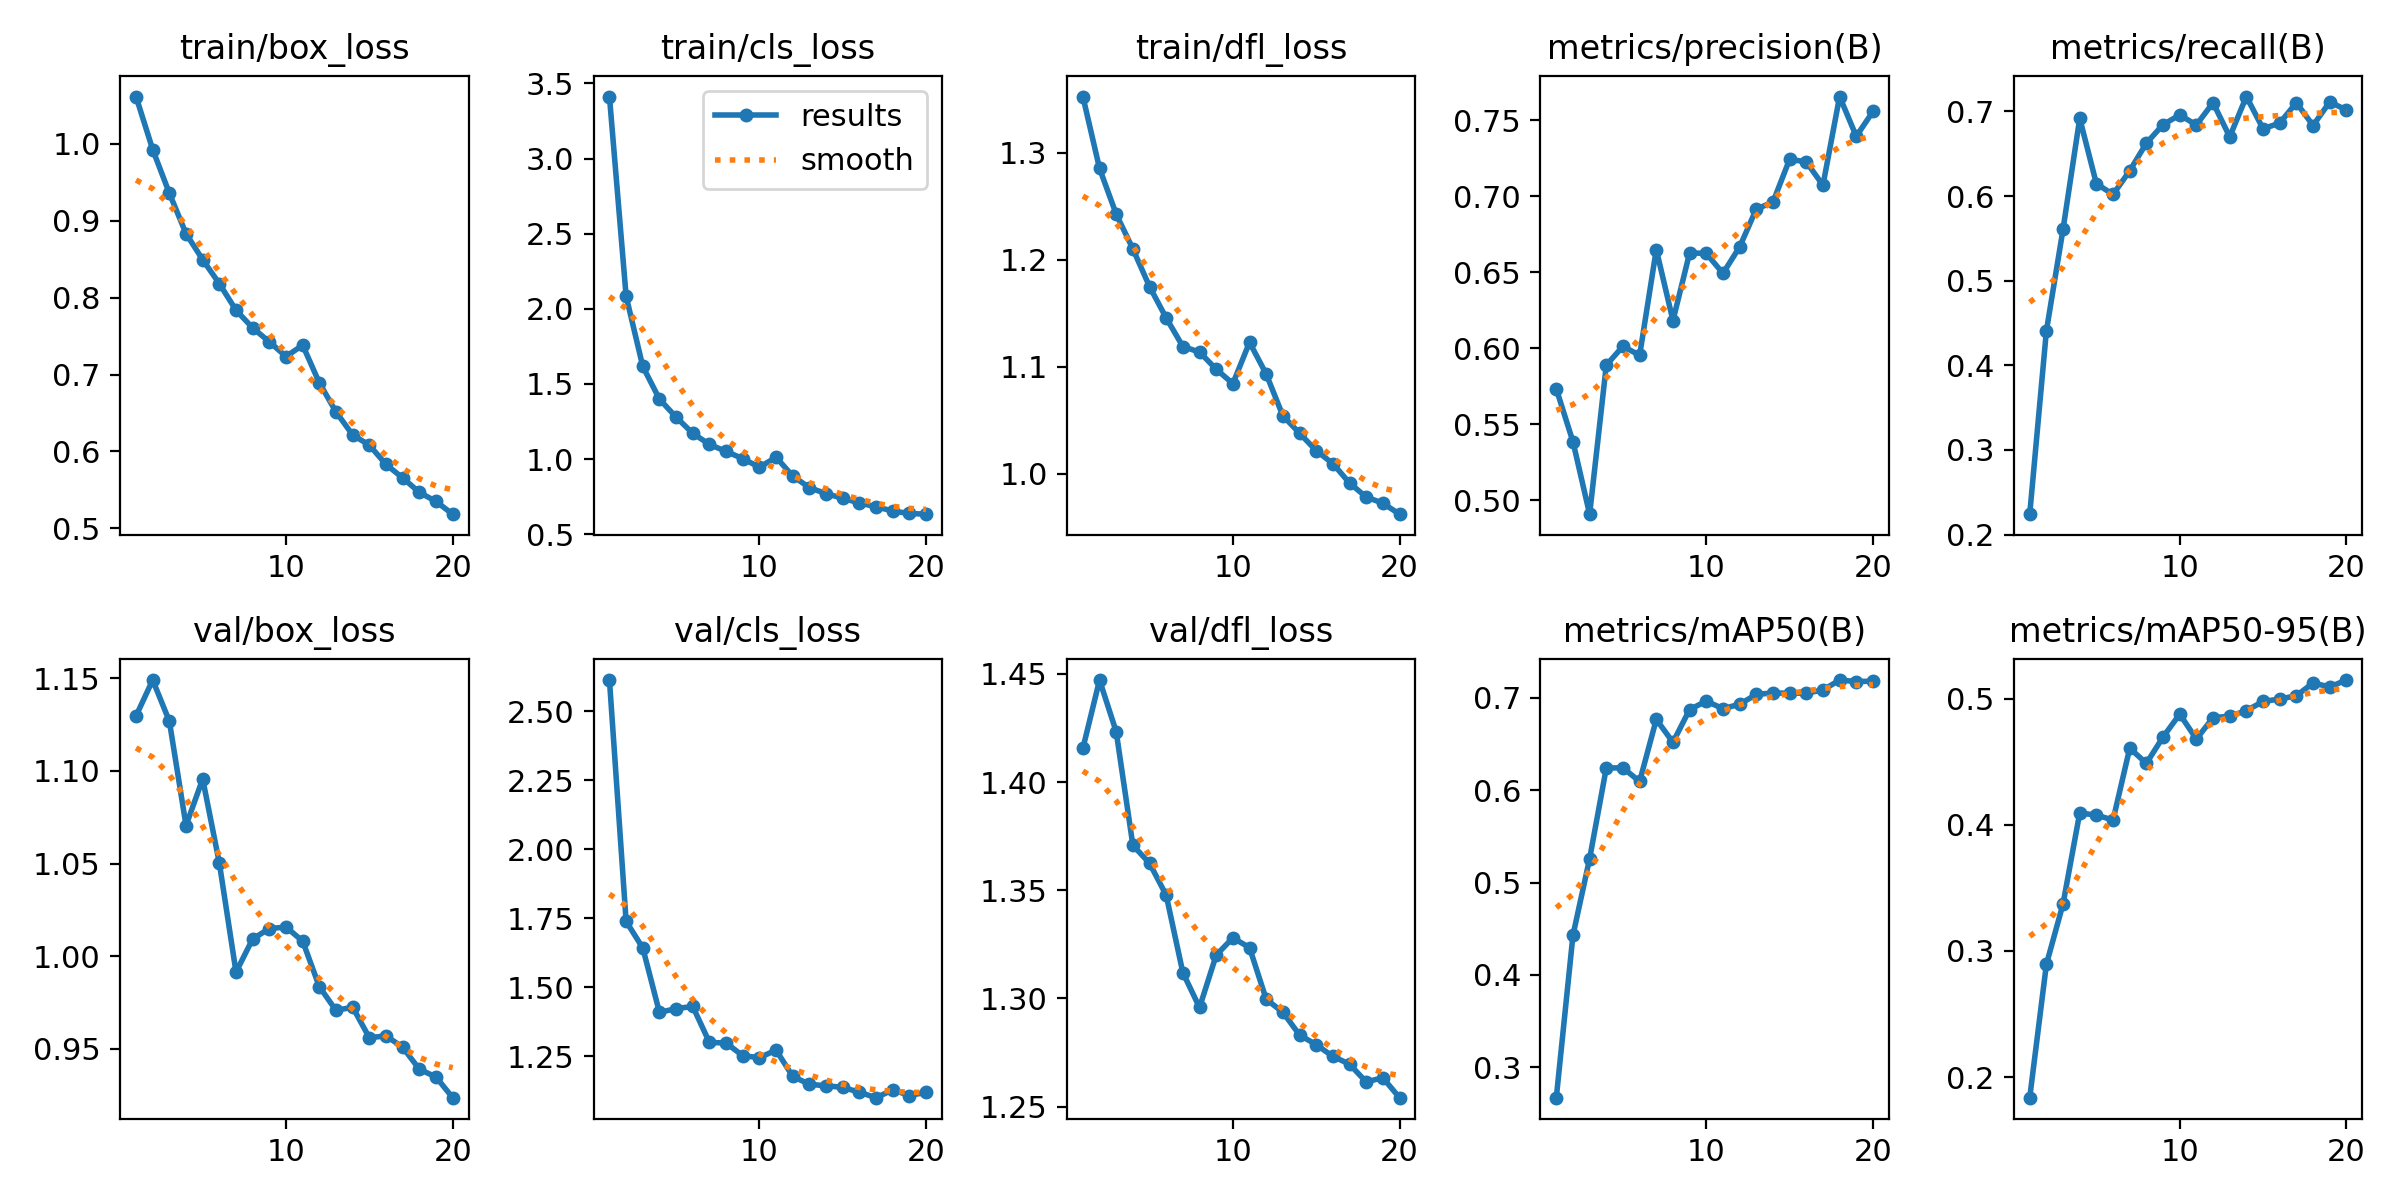

In [15]:
Image('/content/runs/detect/train3/results.png')